In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
datos = pd.read_csv("/content/drive/My Drive/Entrenamieto_ECI_2020.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from cycler import cycler
from math import pi

In [ ]:
datos = datos.loc[datos["ASP"] != 0]

In [ ]:
datos["Total_Amount_converted"] = datos["Total_Amount"] * datos["ASP_(converted)"] / datos["ASP"] #Convierto a dolares

In [ ]:
df = datos
def formateo(x):
    cadena = x.split('/')
    return '{dia:02}/{mes:02}/{ano}'.format(dia=int(cadena[0]), mes=int(cadena[1]),ano=int(cadena[2]))
df['Account_Created_Date'] = df['Account_Created_Date'].apply(formateo)
df['Account_Created_Date'] = pd.to_datetime(df['Account_Created_Date'], format='%m/%d/%Y')
df['Planned_Delivery_Start_Date'] = df['Planned_Delivery_Start_Date'].apply(formateo)
df['Planned_Delivery_Start_Date'] = pd.to_datetime(df['Planned_Delivery_Start_Date'], format='%m/%d/%Y')
df_zona = df[['Stage','Region','Territory','Product_Family','Planned_Delivery_Start_Date']]
df_zona_ganada = df_zona[df_zona['Stage'] == 'Closed Won']
df_region = df_zona_ganada.groupby(['Product_Family','Region'])['Planned_Delivery_Start_Date'].agg(['min','max']).reset_index()
df_region['duracion'] = (df_region['max'] - df_region['min']).dt.days
duracion = df_region.reset_index().groupby('Region')['duracion'].mean()


In [ ]:
datos["Stage_i"] = (datos["Stage"] == "Closed Won").astype(int)
tres_op_type = datos["Region"].value_counts().nlargest(5).reset_index()["index"]
datos_cortos_op = datos.loc[datos["Region"].isin(tres_op_type)]

In [ ]:
datos_plot = datos_cortos_op.groupby("Region").agg({"TRF" : "mean","Billing_Country" : "count","Total_Amount_converted" : "mean","Stage_i" : "mean","Opportunity_ID" : lambda x: len(x.unique())})
datos_plot["duracion"] = duracion
datos_plot_ = datos_plot / datos_plot.sum()
datos_plot_

,TRF,Billing_Country,Total_Amount_converted,Stage_i,Opportunity_ID,duracion
Region,,,,,,
APAC,0.226345,0.195603,0.194868,0.231526,0.214927,0.186279
Americas,0.282169,0.236213,0.343716,0.180885,0.252710,0.179028
EMEA,0.159923,0.278986,0.163876,0.211463,0.332714,0.224424
Japan,0.012837,0.278325,0.033144,0.266117,0.184577,0.359032
Middle East,0.318725,0.010873,0.264396,0.110008,0.015072,0.051236


Index(['APAC', 'Americas', 'EMEA', 'Japan', 'Middle East'], dtype='object', name='Region')


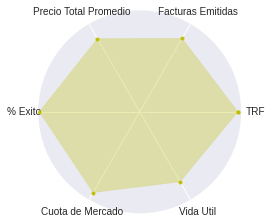

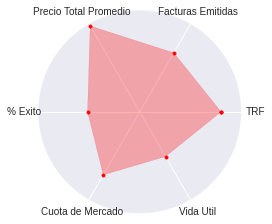

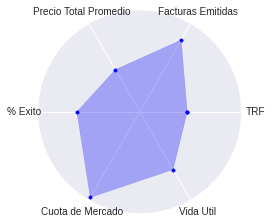

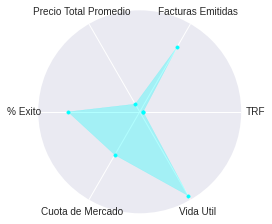

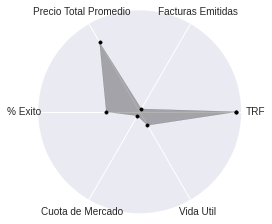

In [ ]:
cat = ["TRF","Facturas Emitidas","Precio Total Promedio","% Exito","Cuota de Mercado","Vida Util"]
values = [datos_plot_.iloc[i,:].values.tolist() for i in range(5)]
values = [(v + v[:1]) for v in values]
values += values[:1]
angles = [n / float(len(cat)) * 2 * pi for n in range(len(cat))]
angles += angles[:1]
colors = ["y","r","b","cyan","black"]
style.use("seaborn")
print(datos_plot_.index)
for val,c in zip(values,colors):
  ax = plt.subplot(122,polar="True")
  plt.scatter(angles,val,marker=".",color=c)
  plt.fill(angles,val,alpha=0.3,color=c)
  plt.xticks(angles[:-1],cat)
  ax.set_rlabel_position(0)
  plt.yticks([])
  
  #plt.legend(datos_plot_.index,loc="lower right")
  plt.show()

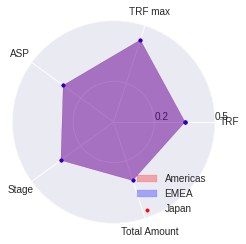

In [ ]:
ax = plt.subplot(122,polar="True")
cat = ["TRF","TRF max","ASP","Stage","Total Amount"]
values = [datos_plot_.iloc[i,:].values.tolist() for i in range(1,2)]
values = [(v + v[:1]) for v in values]
values += values[:1]
angles = [n / float(len(cat)) * 2 * pi for n in range(len(cat))]
angles += angles[:1]
colors = ["r","b","y"]
for val,c in zip(values,colors):
  plt.scatter(angles,val,marker=".",color=c)
  plt.fill(angles,val,alpha=0.3,color=c)
plt.xticks(angles[:-1],cat)
ax.set_rlabel_position(0)
style.use("seaborn")
plt.yticks([0.2,0.5])
plt.legend(datos_plot_.index,loc="lower right")

plt.show()